# EDA

## 1. Importar paquetes

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config IPCompleter.greedy = True

## 2. Carga de los datos

In [14]:
ruta = 'C:/Users/matia/OneDrive/Escritorio/Water_Quality'

In [15]:
trabajo = 'trabajo_resultado_calidad.pickle'

In [16]:
df = pd.read_pickle(ruta + '/02_Datos/03_Trabajo/' + trabajo)

## 3. Analisis Estadistico

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


## 4. Analisis grafico

In [18]:
x = df.drop('Potability', axis = 1)
y = df['Potability']

In [19]:
def graficos(df, tipo = 'hist'):
    columnas = 2
    filas = (len(df.columns) + 1) // columnas
    f, ax = plt.subplots(nrows = filas, ncols= columnas, figsize = (16, filas * 6))
    ax = ax.flat
    for cada, variable in enumerate(df):
        if tipo == 'hist':
            df[variable].plot.hist(ax = ax[cada])
        elif tipo == 'box':
            df[variable].plot.box(ax = ax[cada])
        else:
            return(f'El grafico {tipo} no esta incluido.')
        ax[cada].set_title(variable, fontsize = 12, fontweight = 'bold')
        ax[cada].tick_params(labelsize = 12)
        
    plt.tight_layout()
    plt.show()

### 4.1 Histograma

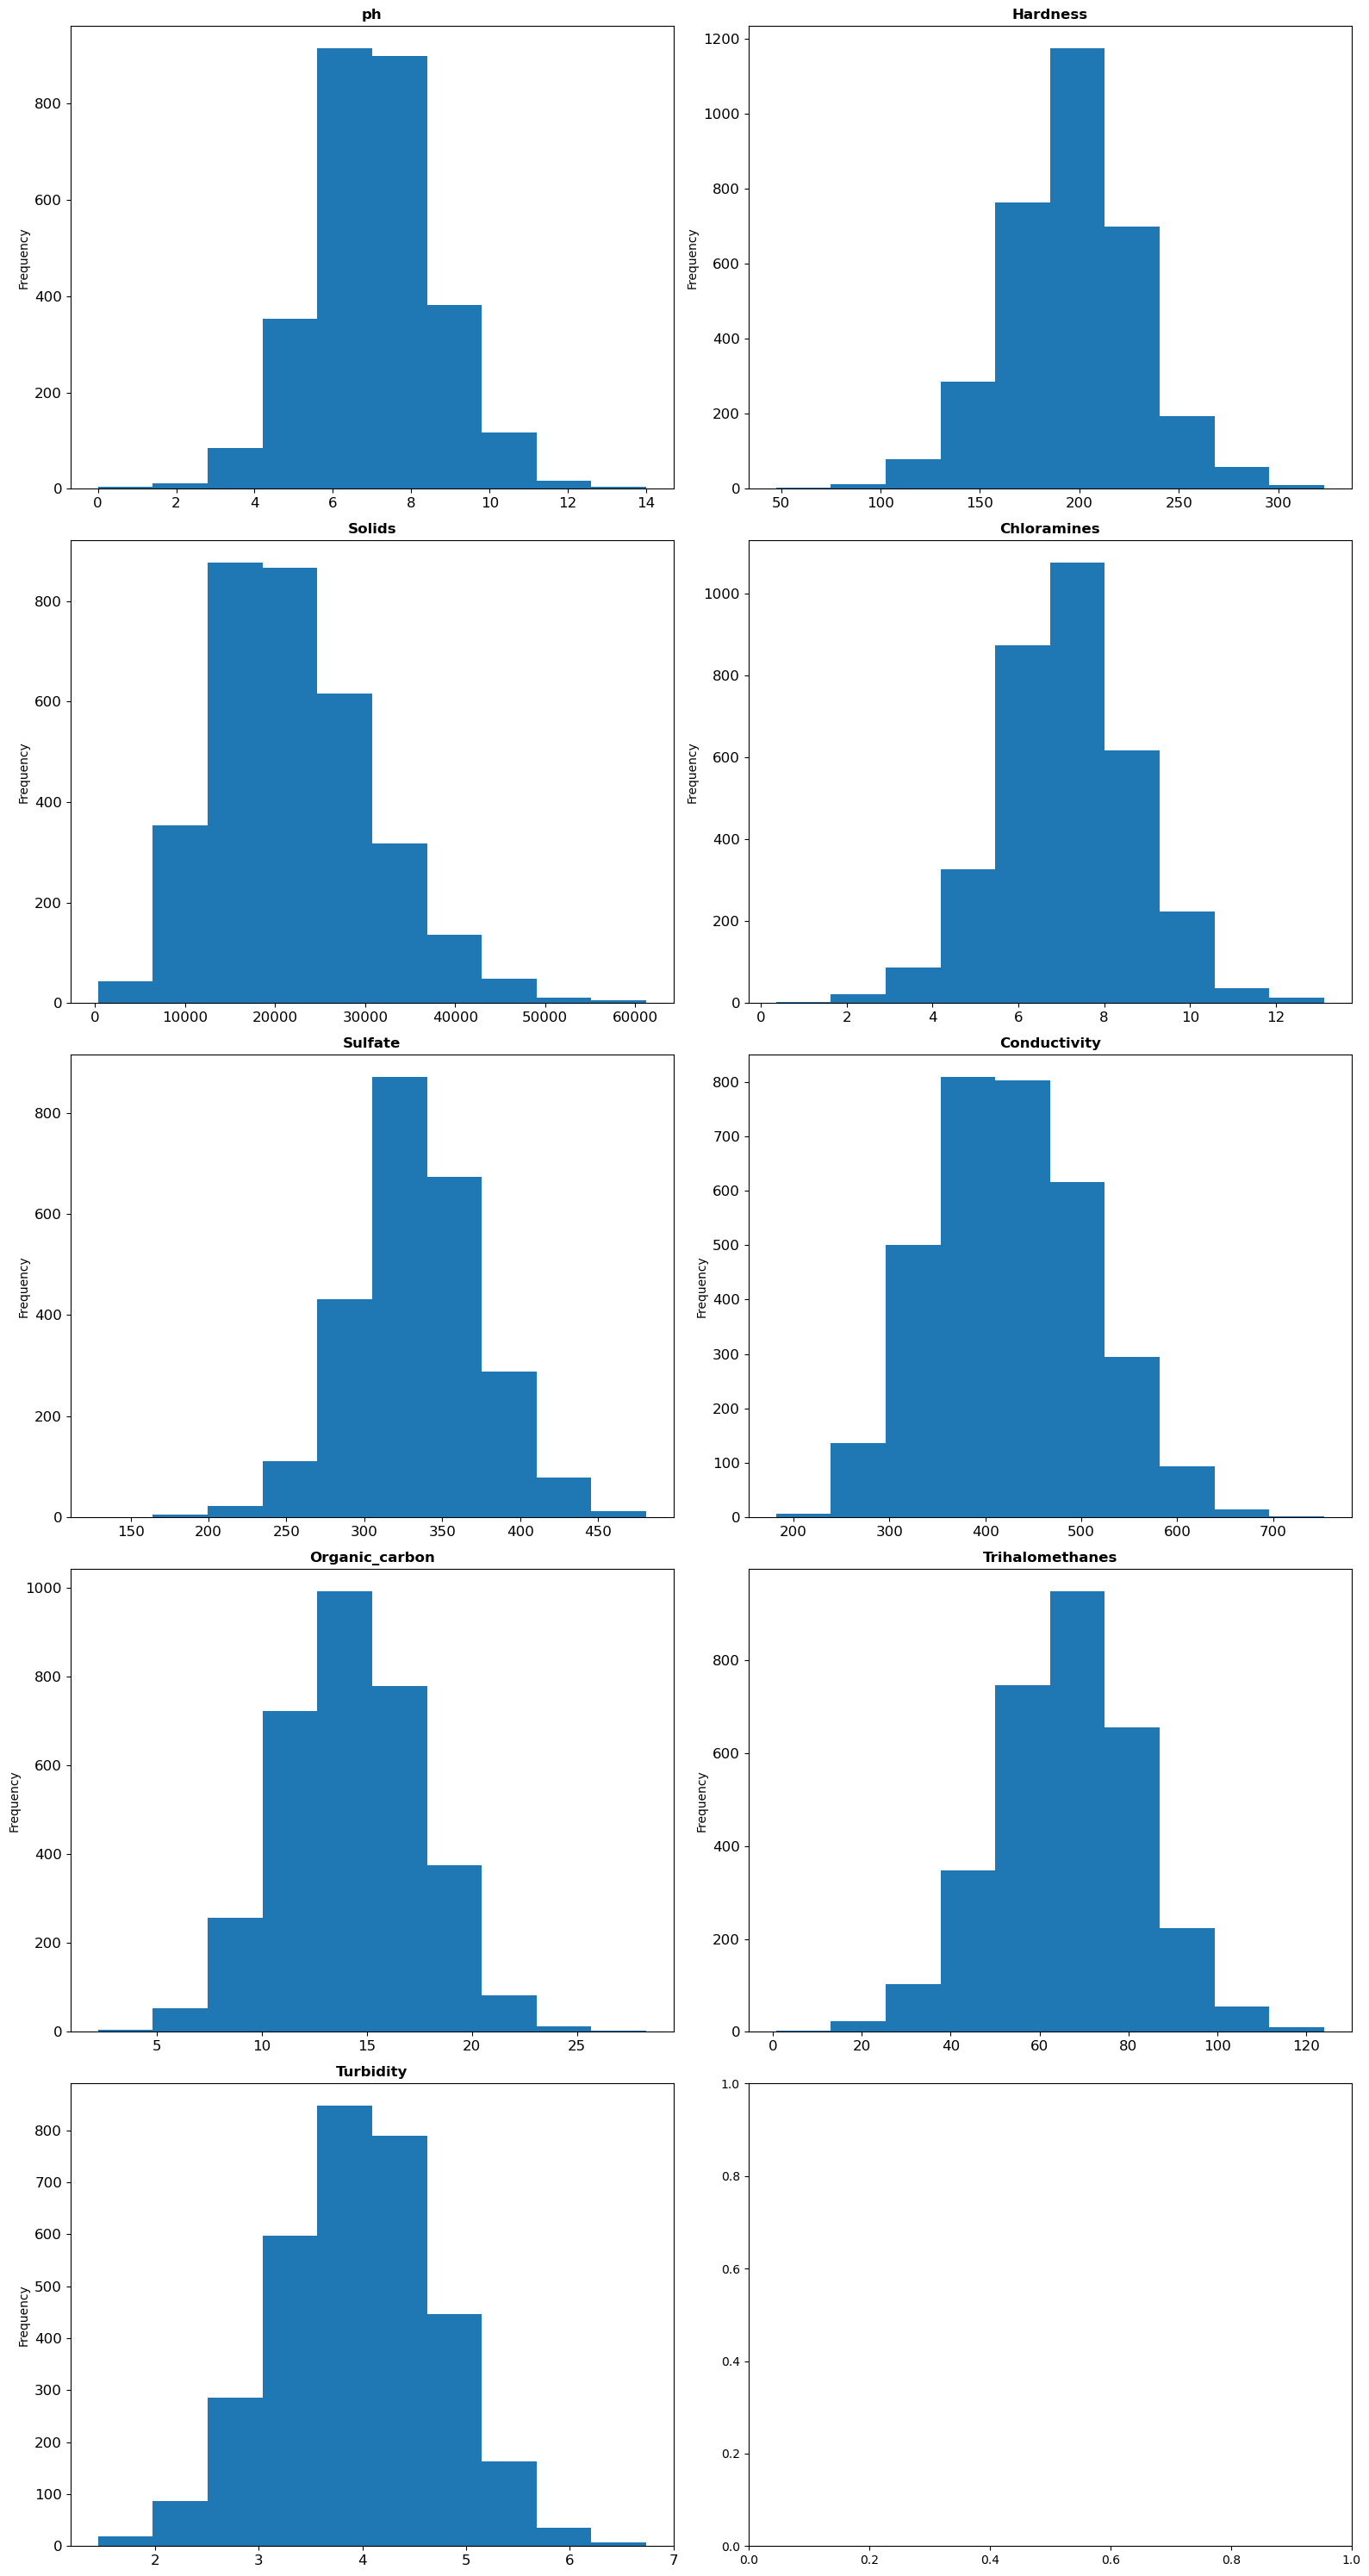

In [20]:
graficos(x)

Las variables no muestran un tendencia irregular, todas en cierto sentido muestran distrubiciones normales.

### 4.2 Box

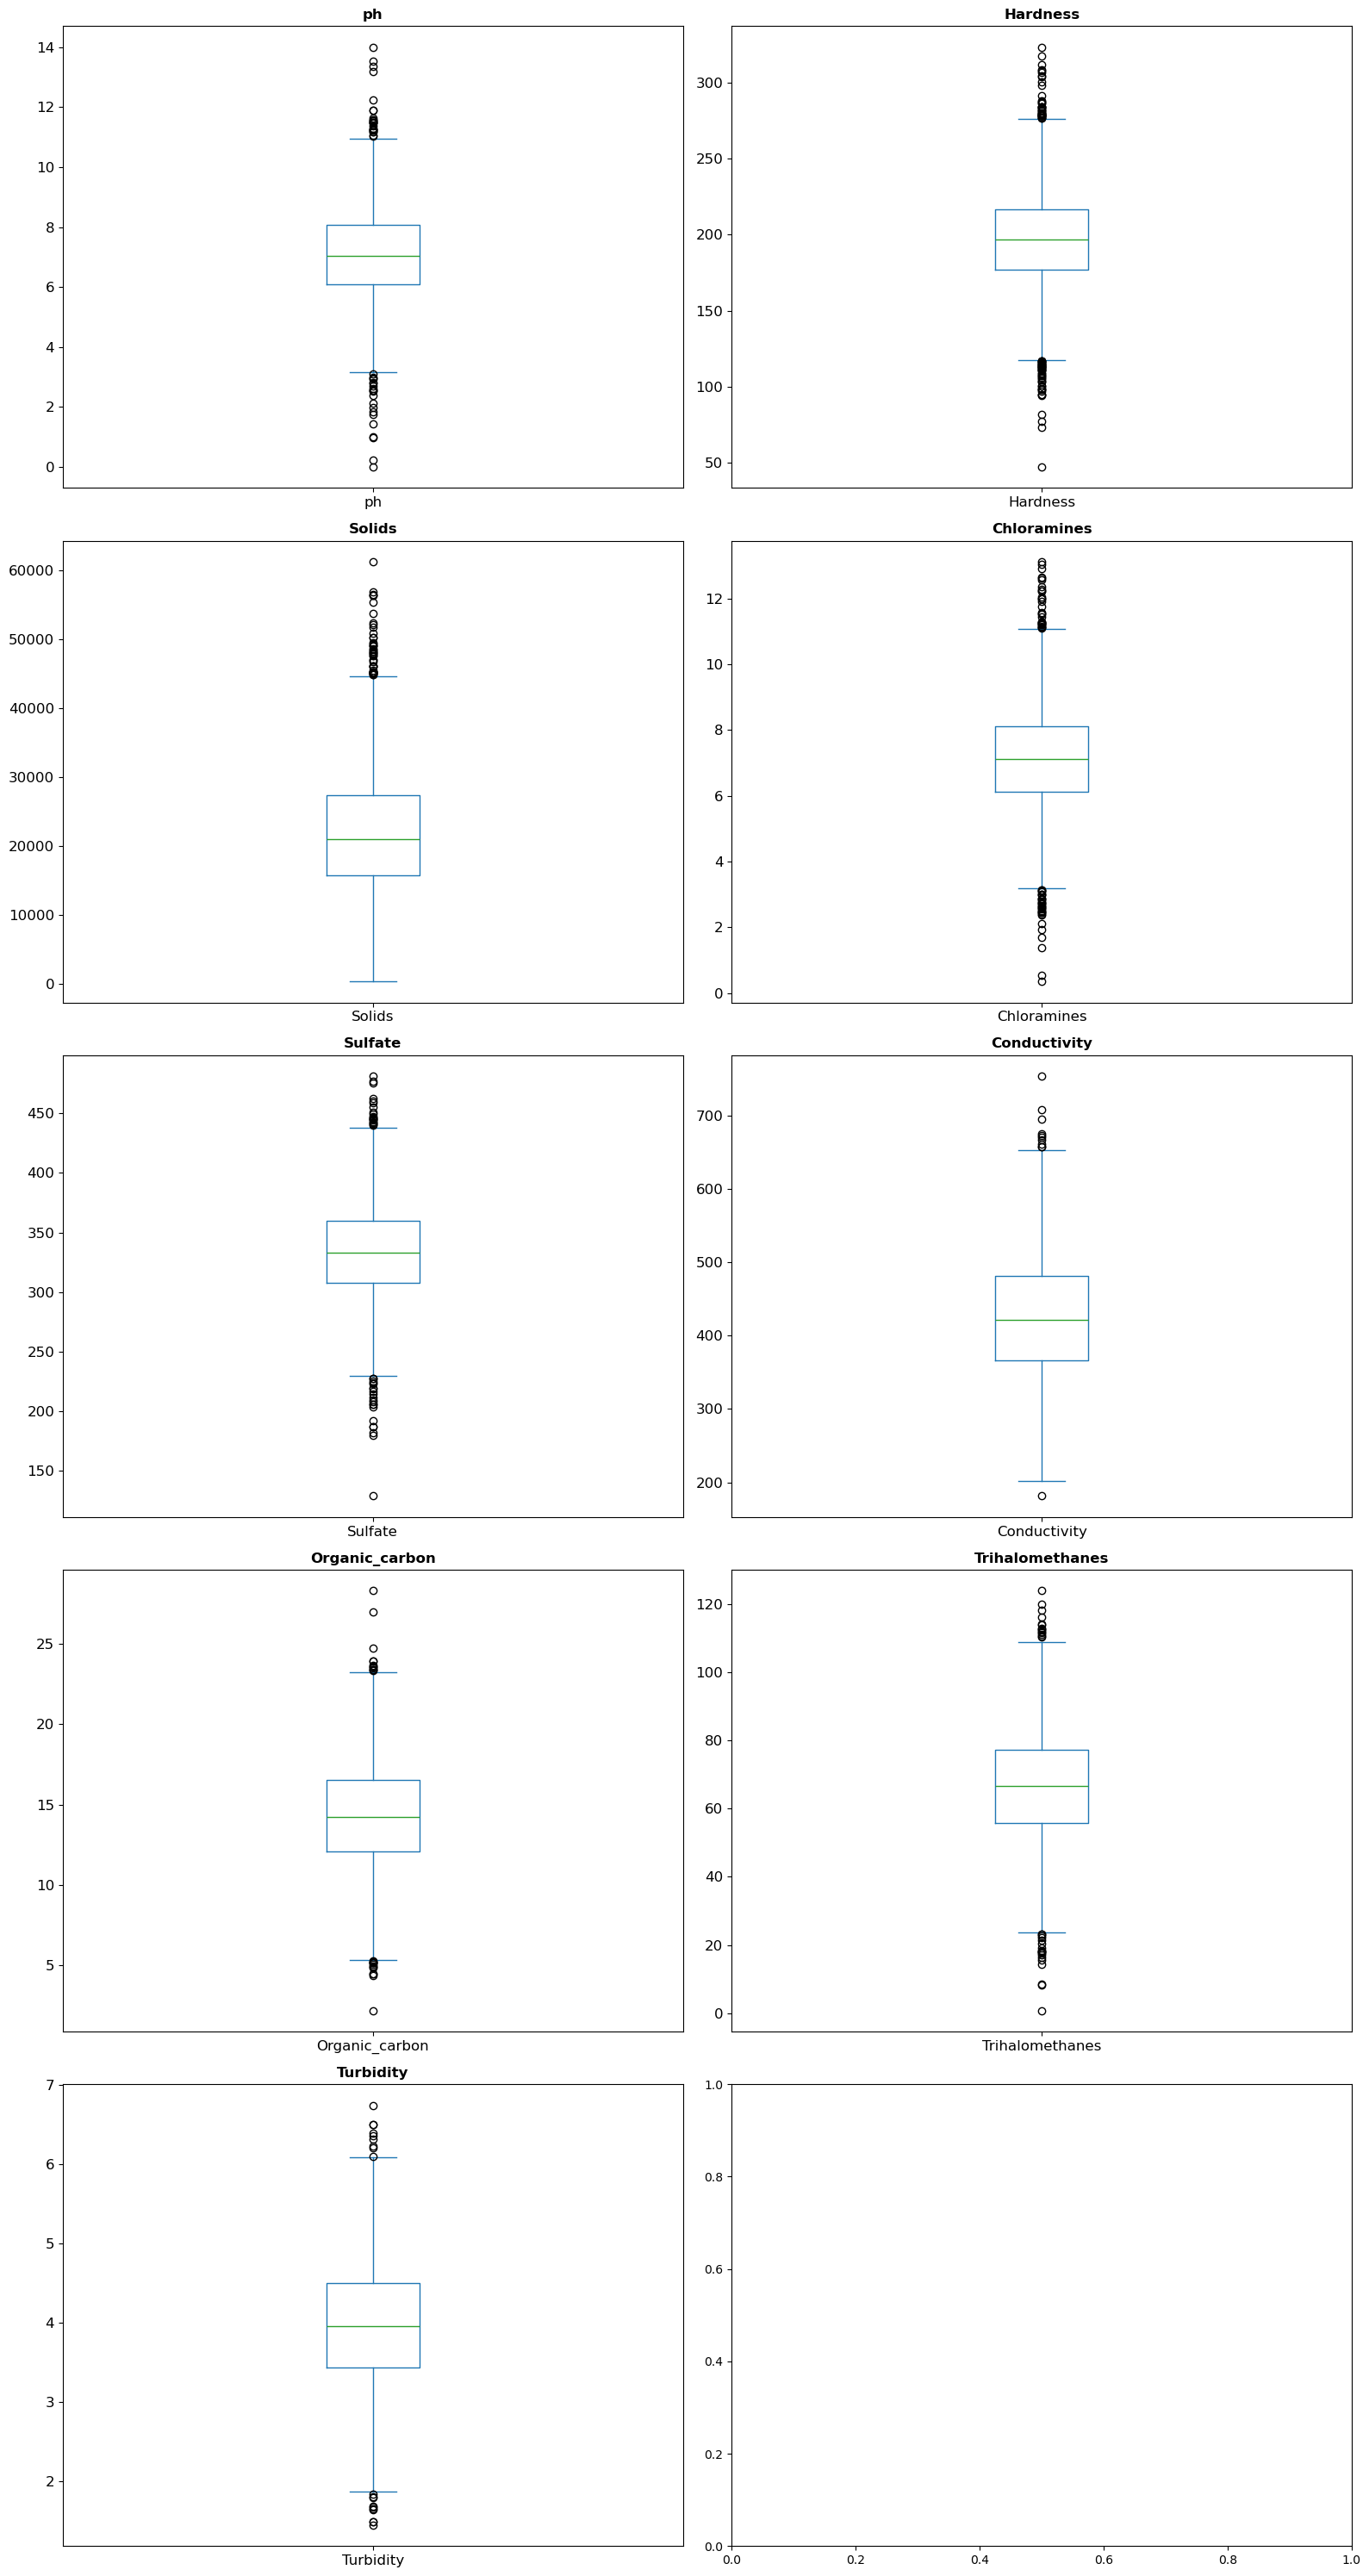

In [21]:
graficos(x, 'box')

Hay bastantes valores atipicos en las mayoria de variables, en un caso donde se tenga mas informacion seria una opcion tratar esos datos o tomar alguna muestra para reducir sus presencia. Sin embargo, dado que son pocos datos lo mejor es conservarlos y en su debido momento reescarlar los datos antes de aplicar el algoritmo.

### 4.3 Correlacion

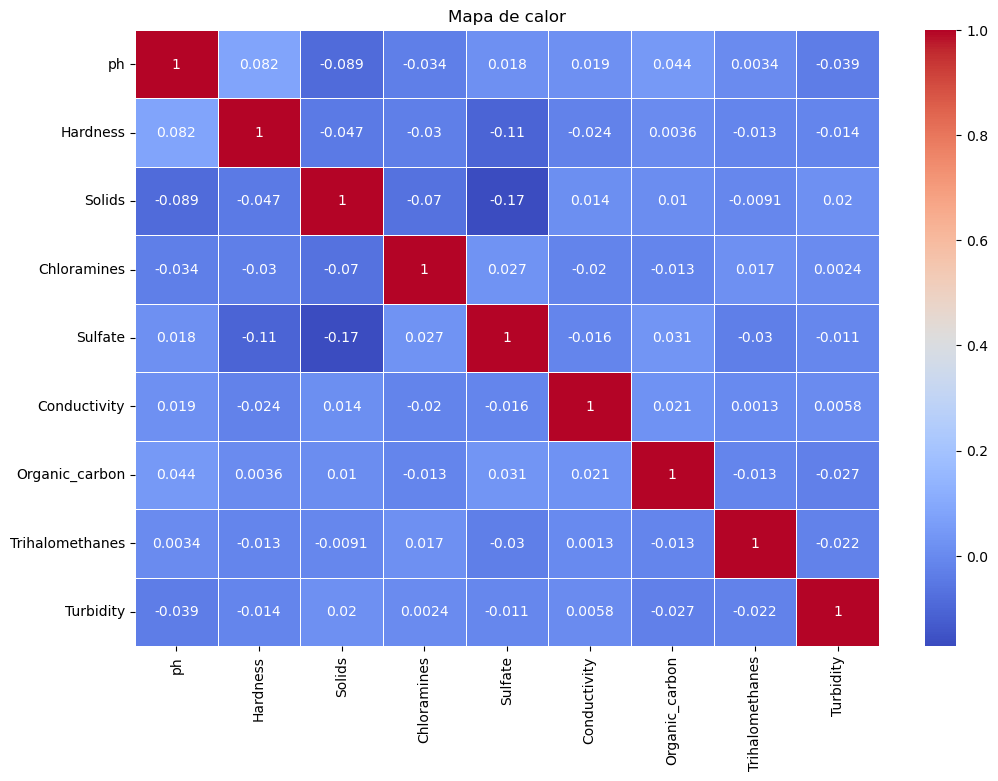

In [22]:
plt.figure(figsize = (12, 8))
sns.heatmap(x.corr(), annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Mapa de calor')
plt.show()

Hay algunas relaciones entre las variables, pero son bajas como para ser concluyentes.

### 4.4 Como se distribuyen las muestras?

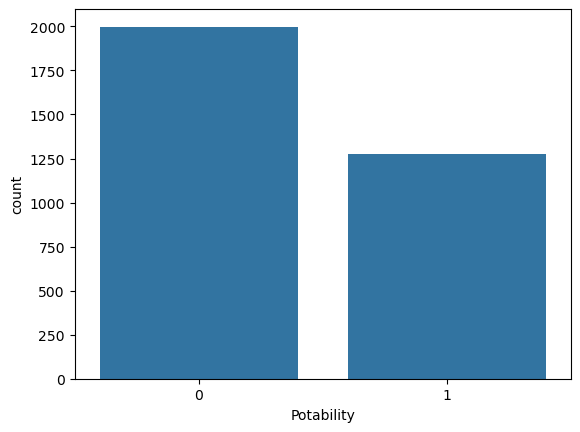

In [27]:
sns.countplot(x = y)
plt.show()

In [29]:
y.value_counts(normalize = True) * 100

Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64

Si se aproxima, un 61% de las muestras son potables.